In [12]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [13]:
n_colors = [64, 32, 16, 8, 4]

In [14]:
bridge = imread("Tower-Bridge.jpg")
bridge = np.array(bridge, dtype=np.float64) / 255
bridge

array([[[0.00392157, 0.44705882, 0.91764706],
        [0.00392157, 0.44705882, 0.91764706],
        [0.00392157, 0.44705882, 0.91764706],
        ...,
        [0.        , 0.35294118, 0.83529412],
        [0.        , 0.35294118, 0.83529412],
        [0.        , 0.35294118, 0.83529412]],

       [[0.00392157, 0.44705882, 0.91764706],
        [0.00392157, 0.44705882, 0.91764706],
        [0.00392157, 0.44705882, 0.91764706],
        ...,
        [0.        , 0.35294118, 0.83529412],
        [0.        , 0.35294118, 0.83529412],
        [0.        , 0.35294118, 0.83529412]],

       [[0.00392157, 0.44705882, 0.91764706],
        [0.00392157, 0.44705882, 0.91764706],
        [0.00392157, 0.44705882, 0.91764706],
        ...,
        [0.        , 0.35294118, 0.83529412],
        [0.        , 0.35294118, 0.83529412],
        [0.        , 0.35294118, 0.83529412]],

       ...,

       [[0.27843137, 0.32941176, 0.5372549 ],
        [0.28235294, 0.33333333, 0.54117647],
        [0.28235294, 0

In [15]:
bridge.shape

(1350, 2400, 3)

In [16]:
w, h, d = tuple(bridge.shape)

image_array = np.reshape(bridge, (w * h, d))
len(image_array)

3240000

In [17]:
unique = np.unique(image_array, axis=0)
len(unique)

402961

In [18]:
image_array_sample = shuffle(image_array, random_state=666, n_samples=5_000)
image_array_sample

array([[0.00784314, 0.34509804, 0.81176471],
       [0.76470588, 0.61176471, 0.68627451],
       [0.16862745, 0.22352941, 0.4627451 ],
       ...,
       [0.61568627, 0.54901961, 0.51764706],
       [0.08627451, 0.01960784, 0.        ],
       [0.        , 0.36470588, 0.87058824]])

In [19]:
def tinify_image(n, sample, toPredict):
    model =  KMeans(
        n_clusters=n,
        init='k-means++',
        n_init="auto",
        random_state=666,
        algorithm="lloyd"
    ).fit(
        sample
    )

    labels = model.predict(toPredict)

    return model, labels


def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

model_to_show, labels_to_show = tinify_image(128, image_array_sample, image_array)

In [20]:
model_to_show.cluster_centers_

array([[0.19578794, 0.11692084, 0.02759622],
       [0.35738562, 0.40562092, 0.74313725],
       [0.67660131, 0.62196078, 0.77843137],
       [0.00260957, 0.35232122, 0.83794694],
       [0.63184789, 0.49102793, 0.39156269],
       [0.34727669, 0.26553377, 0.26840959],
       [0.99114266, 0.98120352, 0.96463827],
       [0.75128999, 0.62373581, 0.51909185],
       [0.96215686, 0.83215686, 0.68588235],
       [0.42565826, 0.36481793, 0.44044818],
       [0.07875817, 0.06348039, 0.0878268 ],
       [0.13375566, 0.38033183, 0.83426848],
       [0.60958606, 0.31590414, 0.02832244],
       [0.22937332, 0.17623991, 0.20023068],
       [0.03284314, 0.37058824, 0.55441176],
       [0.98944193, 0.76319759, 0.43770739],
       [0.48905229, 0.44558824, 0.6372549 ],
       [0.55067873, 0.39577677, 0.25188537],
       [0.31288515, 0.22147526, 0.17600373],
       [0.81751276, 0.71888262, 0.76669353],
       [0.81421569, 0.52892157, 0.25416667],
       [0.23458111, 0.28199643, 0.50819964],
       [0.

In [21]:
print(labels_to_show)
print(len(labels_to_show))

[25 25 25 ... 91 91 91]
3240000


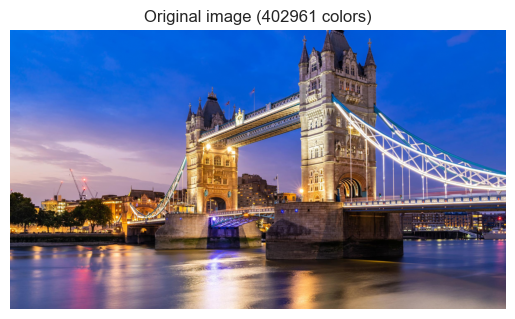

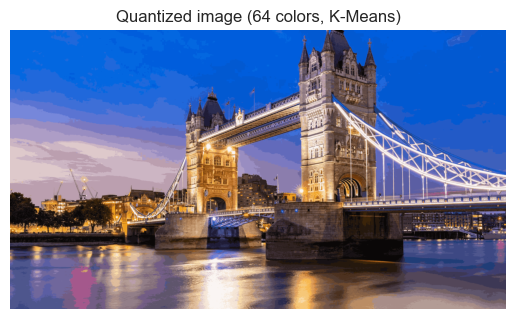

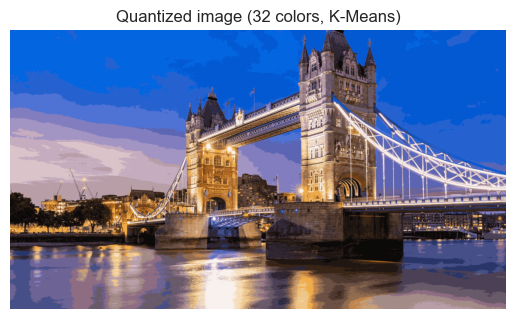

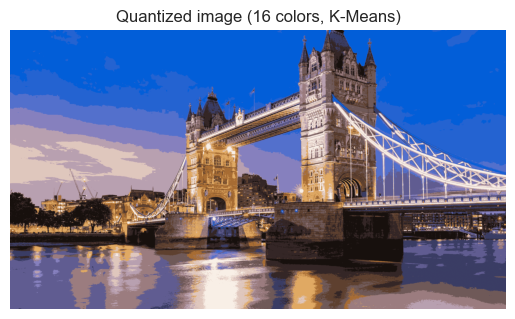

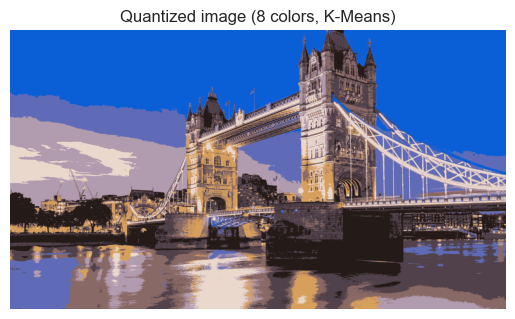

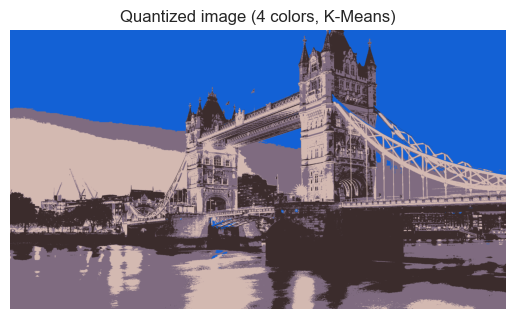

In [22]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original image ({len(unique)} colors)")
plt.imshow(bridge)

for i in range(len(n_colors)):
    m, l = tinify_image(n_colors[i], image_array_sample, image_array)

    plt.figure(2+i)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors[i]} colors, K-Means)")
    plt.imshow(recreate_image(m.cluster_centers_, l, w, h))

    plt.show()